# Cleaning and Analysis of dataset

### I. Data Cleaning

In [1]:
import pandas as pd 
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud,STOPWORDS

In [2]:
df_orig = pd.read_csv("../Data/resume_dataset.csv")
df = df_orig.copy(deep = True)
df.head()

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


#### We see that the resumes provided in the data by default are highty unsuitable for use in our further analysis and modelling. Hence, rigourous cleaning would be necessary.<br>
* In many resumes, phone numbers, email ids, address etc has been censored(replaced by a string of 'x') for privacy reasons. This would add unecessary noise to the dataset as it adds no value.
* The Resumes are in byte strings encoded in utf-8 format. Thye seem to incluse many utf specific chaarcter codes, which aren't interpretable in ascii and can add a lot of noise in assessing the resumes too.

#### Added to all this, the formatting in the resumes are not uniform. The dataset is devoid of a template that the resumes can adhere to. Hence this could make extraction of information for further tasks a tad challeging.

In [3]:
length = df["Resume"].shape
length

(1219,)

In [4]:
df["res_new"] = df["Resume"]
eval_res = df["res_new"].copy(deep=True)

In [5]:
import string
def rem_punc(s):
    punc = string.punctuation
    return " ".join([i for i in s if i not in punc])

def rem_sw(s):
    sw = set(STOPWORDS)
    return " ".join([i for i in s if i not in sw])

In [6]:
#eval_res = Resumes
j=0
i=0
l=[]
for i in range(length[0]):
    try:
        eval_res[i] = eval(eval_res[i]).decode()
    except:
        l.append(i)
        pass

In [7]:
eval_res.shape

(1219,)

In [8]:
df["res_new"] = eval_res
df = df.drop(l,axis=0)

In [9]:
df.shape

(1212, 4)

In [10]:
df = df.reset_index()
length = df["Resume"].shape
eval_res = df["res_new"].copy(deep=True)

In [11]:
REGEX_SPACE = re.compile("[ ][ ]+")
REGEX_JUNK = re.compile("[^A-WX-wyz][xX][^A-WX-wyz]+[ ]*|[.\-_][.\-_]+")
REGEX_EMAIL = re.compile("[Xx]+[._]?[Xx]+.@.[Xx]+\.?[Xx]+")
REGEX_PNO = re.compile("[(][xX][xX][xX][)][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][\-][xX][xX][xX]+[-][xX][xX][xX]+")

In [12]:
for i in range(length[0]):
    eval_res[i] = " ".join(eval_res[i].split("\n"))
    token = nltk.word_tokenize(eval_res[i])
    eval_res[i] = rem_sw(token)
    eval_res[i] = rem_punc(token)
    eval_res[i] = eval_res[i].lower()
eval_res_backup  = eval_res.copy(deep = True)

In [13]:
for i in range(length[0]):
    eval_res[i] = (eval_res[i].encode("ASCII","ignore")).decode() #encoding the text to ascii.

In [14]:
df["res_new"] = eval_res
df_cols = ["ID","Category","res_new","Resume"]
df = df[df_cols]
df.head()

,ID,Category,res_new,Resume
0,1,HR,john h. smith p.h.r 800-991-5187 po box 1673 c...,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id career ...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert in organizatio...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


** Removal of 'x' used to censor personal information **

In [738]:
df.to_csv("clean_data.csv")
print("Cleaned dataset written to cleaned_data.csv")

Cleaned dataset written to cleaned_data.csv


In [15]:
df["newer_res"] = df["res_new"] 
for i,j in enumerate(df.itertuples()):
    strin = re.sub(REGEX_PNO," ",j[3])
    strin = re.sub(REGEX_EMAIL," ",strin)
    strin = re.sub(REGEX_JUNK, " ",strin)
    strin = re.sub(REGEX_SPACE," ",strin)
    df["newer_res"][i] = strin

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [16]:
df.head()
df["newer_res"][188]
df = df[["ID","Category","newer_res","Resume"]]
#df["newer_res"][146]

In [17]:
df.to_csv("clean_data1.csv")
print("Cleaned dataset written to cleaned_data.csv")

Cleaned dataset written to cleaned_data.csv


In [18]:
df.head()

,ID,Category,newer_res,Resume
0,1,HR,john h. smith p.h.r 800-991-5187 po box 1673 c...,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id career ...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert in organizatio...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


### II. Analysis

### Distribution of samples across the classes - Classwise Distribution

In [19]:
freq = list(collections.Counter(df["Category"]).items())
freq = list(zip(*freq))

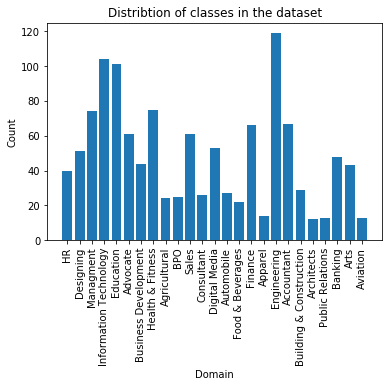

In [20]:
plt.bar(freq[0],freq[1])
plt.ylabel("Count")
plt.xlabel("Domain")
plt.title("Distribtion of classes in the dataset")
plt.xticks(rotation=90)
plt.show()

##### We see that distribution of resumes amongst the various classes is non uniform. Resumes belonging to Engineering and Information technology seem to dominate the dataset.

We see that there no missing values, hence eliminating the need to worry about imputations and so on.

## Frequency of words in the resumes.

In [22]:
sw = set(STOPWORDS)
eval_res = df["newer_res"].copy(deep=True)
sw_data=''
for i in eval_res:
    #token = nltk.word_tokentize()
        sw_data+=i
len(sw_data)

6967913

In [23]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 13).generate(sw_data)

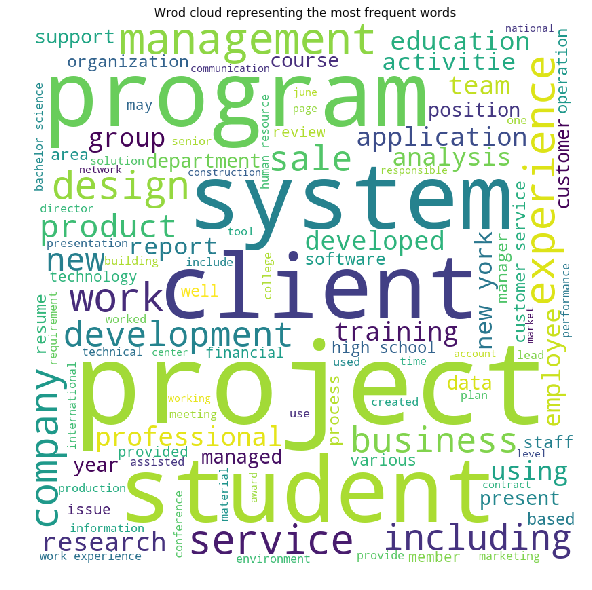

In [24]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wrod cloud representing the most frequent words")
plt.axis("off") 
plt.tight_layout(pad = 0) 

**The word-cloud clearly sheds light on words like "project", "program", "system", "student", etc which are natuarally quite a lot likely to occur in resumes in general. Resumes are quite comprhensive around the "PROJECT" section and hence a resume is bound to have the word "project" appear quite a lot of times.** <BR>


## III. Find the frequency of adjectives used

In [25]:
def pos_tag(s):
    return nltk.pos_tag(s)

adj_list={}
for i in range(length[0]):
    token = nltk.word_tokenize(eval_res[i])
    pos_token = pos_tag(token)
    for i,tag in pos_token:
        if tag in ["JJ","JJR","JJS"]:
            if i in adj_list:
                adj_list[i]+=1
            else:
                adj_list[i] = 1

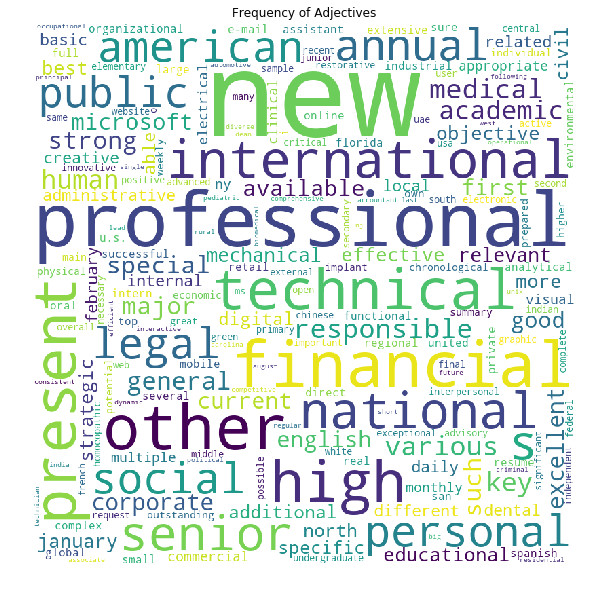

In [26]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 10).generate_from_frequencies(adj_list)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Frequency of Adjectives")
plt.axis("off") 
plt.tight_layout(pad = 0) 

**Since for the most part, one is trying to create a good impression of his/her resume in the recruiter's mind, use of good adjectives is really common and the frequency of adjectives could perhaps give us more insight into our dataset.**
* Words like professional, responsible, academic, technical, social which are quiet prominent in the wordcloud, could have been mainly used in describing oneself.
* Words like Annual, various, international, medical, senior, legal, public etc couldve been used to exaplin about the past designations/jobs/income etc.